In [1]:
suppressMessages(library(ArchR))
ss <- function(x, pattern, slot = 1, ...) { sapply(strsplit(x = x, split = pattern, ...), '[', slot) }
options(stringsAsFactors = F)
options(repr.plot.width=11, repr.plot.height=8.5)
suppressMessages(library(Seurat))
suppressMessages(library(tidyverse))
suppressMessages(library(SingleCellExperiment))

Warning message:
“package ‘gtable’ was built under R version 4.1.3”
Warning message:
“package ‘magrittr’ was built under R version 4.1.3”
Warning message:
“package ‘plyr’ was built under R version 4.1.3”
Warning message:
“package ‘stringr’ was built under R version 4.1.3”
Warning message:
“package ‘data.table’ was built under R version 4.1.3”
Warning message:
“package ‘Matrix’ was built under R version 4.1.3”
Warning message:
“package ‘Rcpp’ was built under R version 4.1.3”
Warning message:
“package ‘tidyverse’ was built under R version 4.1.3”
Warning message:
“package ‘tibble’ was built under R version 4.1.3”
Warning message:
“package ‘tidyr’ was built under R version 4.1.3”
Warning message:
“package ‘readr’ was built under R version 4.1.3”
Warning message:
“package ‘purrr’ was built under R version 4.1.3”
Warning message:
“package ‘dplyr’ was built under R version 4.1.3”
Warning message:
“package ‘forcats’ was built under R version 4.1.3”


In [2]:
##################################
### set Arrow File parameters ####
addArchRThreads(threads = 12)

##################################
### load rheMac10 ArchR genome ###
GENOMEDIR='/home/bnphan/resources/genomes/rheMac10'
load(file.path(GENOMEDIR,'rheMac10_liftoff_GRCh38.p13_ArchR_annotations.rda'))

Setting default number of Parallel threads to 12.



In [3]:
PROJDIR='../../../data/tidy_data/ArchRProjects'
proj = loadArchRProject(file.path(PROJDIR,'Rat_Transgen_NAc_scATAC'), showLogo = FALSE)
projMSN = loadArchRProject(file.path(PROJDIR,'Rat_Transgen_NAc_scATAC_MSN'), showLogo = FALSE)
projNeuron = loadArchRProject(file.path(PROJDIR,'Rat_Transgen_NAc_scATAC_Neuron'), showLogo = FALSE)
projGlia = loadArchRProject(file.path(PROJDIR,'Rat_Transgen_NAc_scATAC_Glia'), showLogo = FALSE)

Successfully loaded ArchRProject!

Successfully loaded ArchRProject!

Successfully loaded ArchRProject!

Successfully loaded ArchRProject!



In [4]:
getCellColData(proj)

DataFrame with 26261 rows and 20 columns
                           Sample TSSEnrichment ReadsInTSS ReadsInPromoter
                      <character>     <numeric>  <numeric>       <numeric>
1S#AGAAGGTGTTGTTCAC-1          1S         3.581       1152           10361
1S#AAGCCTGTCTTAGGGT-1          1S         3.240       1170           10461
1S#ACTTGAATCGGTTCCT-1          1S         4.230       1598           12207
1S#GGCTTCAAGCAAACCT-1          1S         3.023        974            9403
1S#TCACTGACAACTGGCT-1          1S         3.668       1267           10649
...                           ...           ...        ...             ...
5M#TCCAGGATCCTGGTGA-1          5M         8.641        144             844
5M#CGTGACATCTTACTCG-1          5M         6.450        114             692
5M#GGTGTGACATTAGCCA-1          5M         4.408         69             547
5M#TTTGTTGGTGGTTCTT-1          5M         7.178        116             663
5M#ATGCGATTCACAAGCT-1          5M        16.304        247 

# Add integrated labels from subclustering

In [5]:
df_MSN = getCellColData(projMSN) %>% as.data.frame() %>% rownames_to_column('Barcode')
df_Neuron = getCellColData(projNeuron) %>% as.data.frame() %>% rownames_to_column('Barcode') %>% 
    filter(Barcode %ni% df_MSN$Barcode)
df_Glia = getCellColData(projGlia) %>% as.data.frame() %>% rownames_to_column('Barcode')

df_label = data.table::rbindlist(list(df_MSN, df_Neuron, df_Glia), fill = TRUE) %>% 
    mutate(cluster_rat_RNA2ATAC = ifelse(!is.na(cluster_rat_RNA2ATAC), cluster_rat_RNA2ATAC, cluster_rat), 
          cluster_macaque_RNA2ATAC = ifelse(!is.na(cluster_macaque), cluster_macaque, Celltype1))

table(df_label$cluster_rat_RNA2ATAC)
table(df_label$cluster_macaque_RNA2ATAC)
class(df_label$Barcode)
class(df_label$cluster_macaque_RNA2ATAC)

df_label = df_label[df_label$Barcode %in% proj$cellNames]


      Astrocytes       D1-ICj-MSN           D1-MSN     D1-NUDAP-MSN 
             899              419             2173              501 
D1/D2-Hybrid-MSN        D1/D3-MSN           D2-MSN        Microglia 
             607              893             2478              527 
          Oligos       Oligos_Pre        Pvalb-INT          Sst-INT 
            1416              942               78              102 


       Astro D1.D2.Hybrid       D1.ICj     D1.NUDAP     D1.Shell     D2.Shell 
        1151          607          419          501         3066         2478 
Interneurons    Microglia       Neuron        Oligo          OPC 
         180         1109        14199         2392         1483 

[1] "character"

[1] "character"

preClust,
Neuron,NA
D2.Shell,D2-MSN
D1.Shell,D1-MSN
D1.Shell,D1/D3-MSN
D1.D2.Hybrid,D1/D2-Hybrid-MSN
Microglia,Microglia
D1.NUDAP,D1-NUDAP-MSN
Interneurons,Pvalb-INT
Interneurons,Sst-INT
D1.ICj,D1-ICj-MSN



       Astro D1.D2.Hybrid       D1.ICj     D1.NUDAP     D1.Shell     D2.Shell 
        1147          604          414          495         3035         2461 
Interneurons    Microglia        Oligo          OPC 
         169         1106         2392         1480 

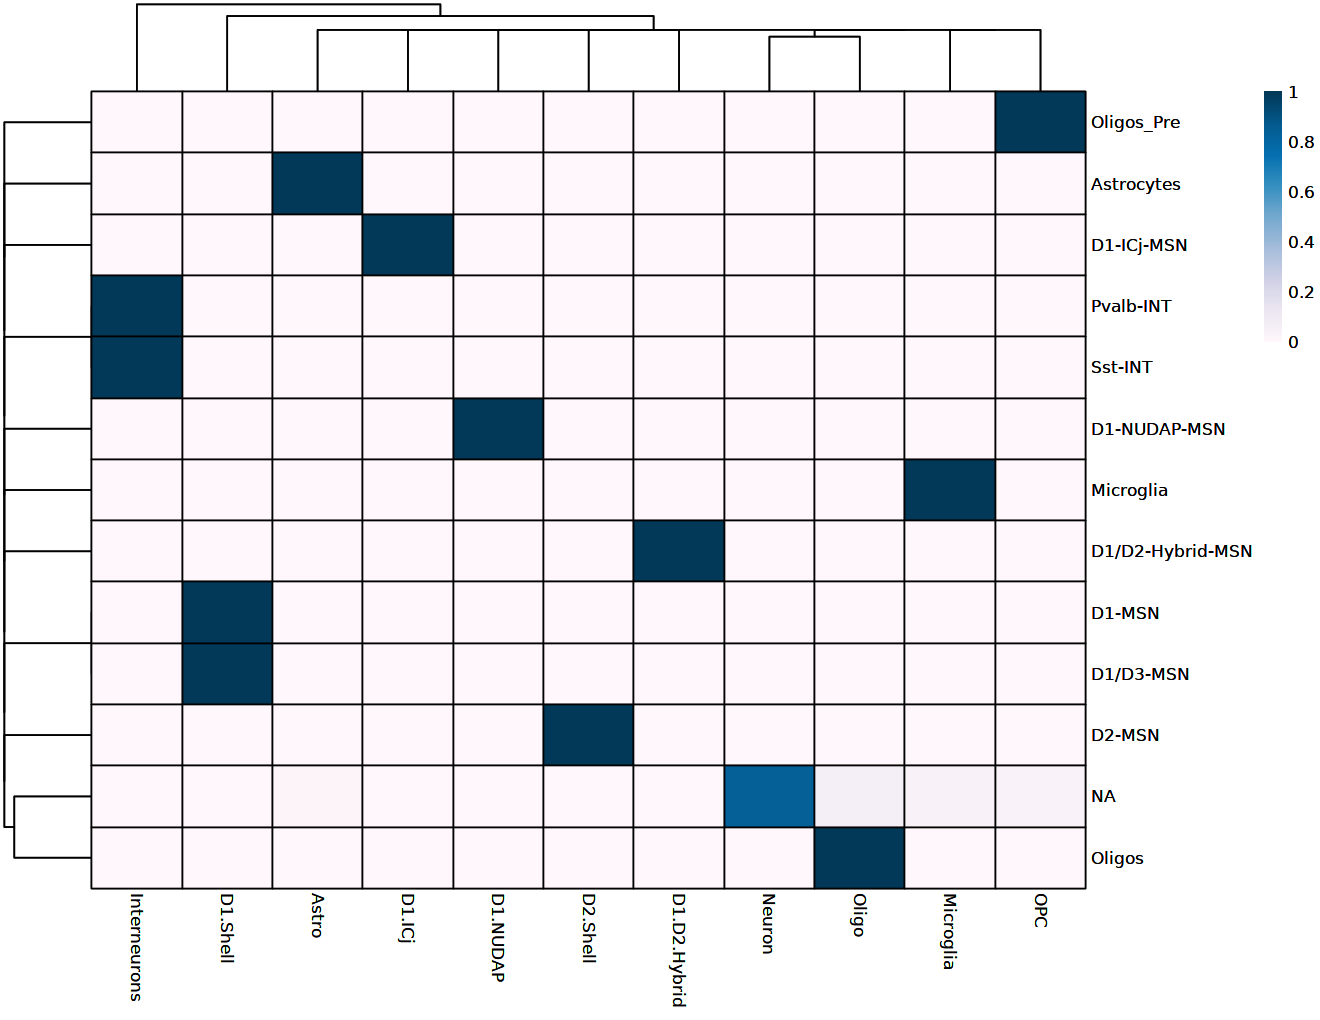

In [8]:
# plot the confusion matrix of cell types by predicted cell type clusters
df = df_label %>% filter(cluster_macaque_RNA2ATAC!= 'Neuron')
cM <- confusionMatrix(df_label$cluster_rat_RNA2ATAC, df_label$cluster_macaque_RNA2ATAC)
cM <- cM / Matrix::rowSums(cM)
p <- pheatmap::pheatmap(
  mat = as.matrix(cM), 
  color = paletteContinuous("whiteBlue"), 
  border_color = "black")
p

preClust <- colnames(cM)[apply(cM, 1 , which.max)]
cbind(preClust, rownames(cM)) #Assignments
remapClust = setNames(colnames(cM)[apply(cM, 1, which.max)], rownames(cM))

df_label$cluster_macaque_RNA2ATAC = 
with(df_label, ifelse(cluster_macaque_RNA2ATAC!= 'Neuron', 
                      cluster_macaque_RNA2ATAC, remapClust[cluster_rat_RNA2ATAC]))
table(df_label$cluster_macaque_RNA2ATAC)

In [9]:
## transfer labels via cell barcodes
proj <- addCellColData(ArchRProj = proj, data = df_label$cluster_macaque_RNA2ATAC,
    cells = df_label$Barcode, name = "cluster_macaque_RNA2ATAC", force = TRUE)

idxSample <- BiocGenerics::which(!is.na(proj$cluster_macaque_RNA2ATAC))

In [10]:
length(idxSample)
cellsSample <- proj$cellNames[idxSample]
proj = subsetCells(ArchRProj = proj, cellNames = cellsSample)

table(proj$cluster_macaque_RNA2ATAC)
getCellColData(proj)

[1] 13303


       Astro D1.D2.Hybrid       D1.ICj     D1.NUDAP     D1.Shell     D2.Shell 
        1147          604          414          495         3035         2461 
Interneurons    Microglia        Oligo          OPC 
         169         1106         2392         1480 

DataFrame with 13303 rows and 21 columns
                           Sample TSSEnrichment ReadsInTSS ReadsInPromoter
                      <character>     <numeric>  <numeric>       <numeric>
1S#TTGTGCCTCCTGTTCA-1          1S         4.660        913            6950
1S#AAGTTTGTCACCATTT-1          1S         3.868        840            6645
1S#AGGTCCGGTATCTGGA-1          1S         4.541        892            6618
1S#GCCTATTGTGTGTCCC-1          1S         4.270        856            6571
1S#GGTTTAATCCAGGTTG-1          1S         4.365        853            6508
...                           ...           ...        ...             ...
5M#ATGTCCACAACCCTAA-1          5M        13.340        256            1228
5M#TCCAGGATCCTGGTGA-1          5M         8.641        144             844
5M#CGTGACATCTTACTCG-1          5M         6.450        114             692
5M#GGTGTGACATTAGCCA-1          5M         4.408         69             547
5M#ATGCGATTCACAAGCT-1          5M        16.304        247 

In [11]:
proj = subsetArchRProject( proj, outputDirectory = file.path(PROJDIR,'Rat_Transgen_NAc_scATAC_clusterMacaque'), force = TRUE)

Copying ArchRProject to new outputDirectory : /projects/pfenninggroup/singleCell/Pierce_transgen_rat_multiome/data/tidy_data/ArchRProjects/Rat_Transgen_NAc_scATAC_clusterMacaque

Copying Arrow Files...

Getting ImputeWeights

No imputeWeights found, returning NULL

Copying Other Files...

Copying Other Files (1 of 2): Embeddings

Copying Other Files (2 of 2): IterativeLSI200_ATAC

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
           

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2740f44be0ddf-Date-2022-12-06_Time-00-11-29.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2740f44be0ddf-Date-2022-12-06_Time-00-11-29.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2740f17b20c2d-Date-2022-12-06_Time-00-11-30.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2740f17b20c2d-Date-2022-12-06_Time-00-11-30.log



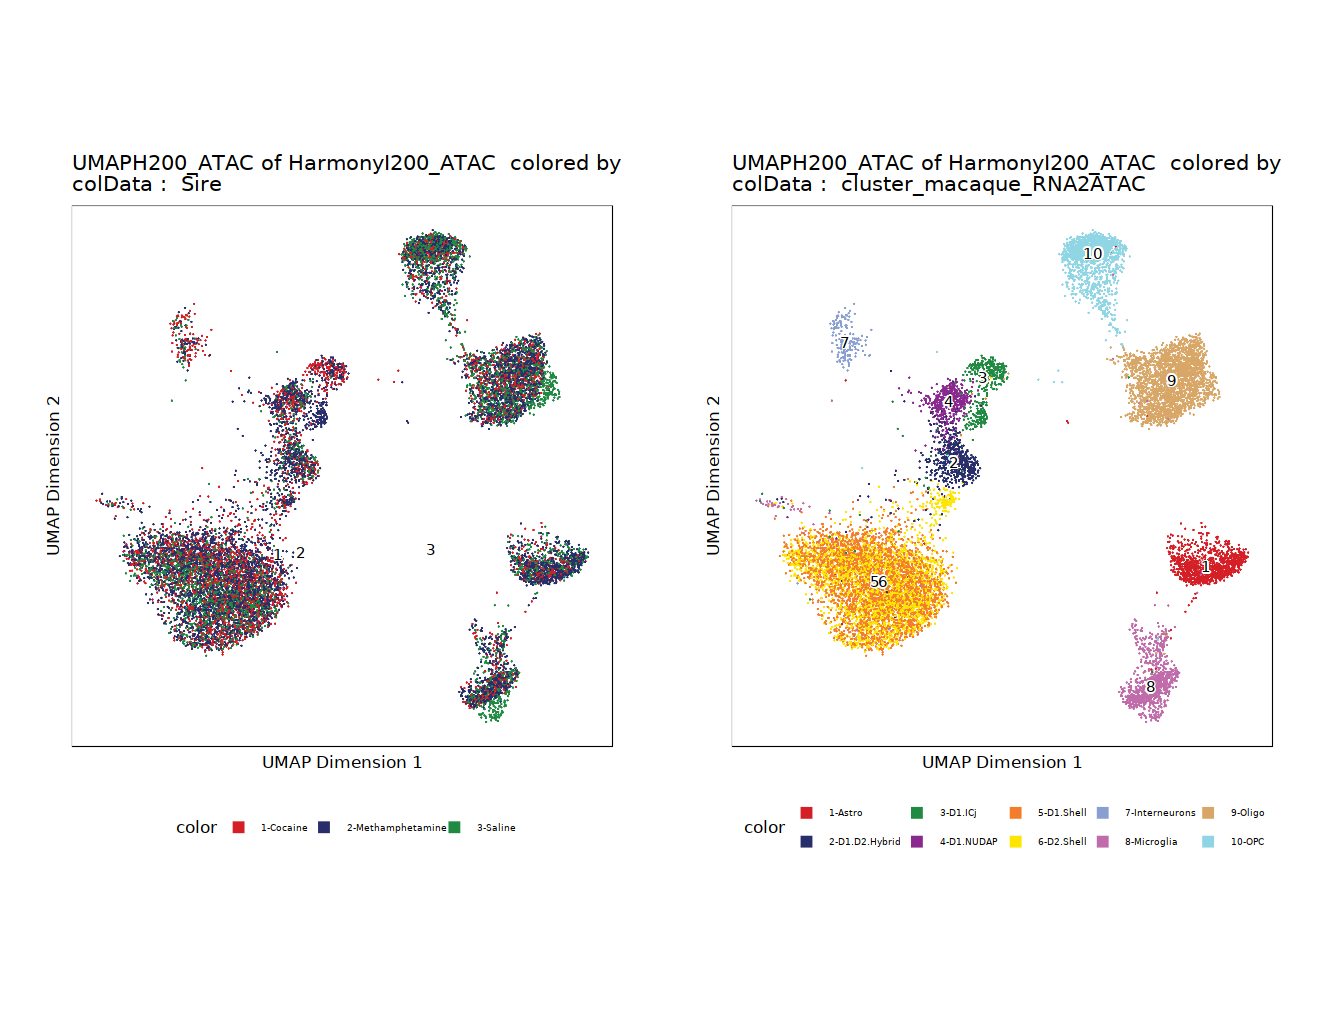

In [12]:
## make UMAP plots
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "Sire", embedding = "UMAPH200_ATAC")

p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "cluster_macaque_RNA2ATAC", embedding = "UMAPH200_ATAC")

ggAlignPlots(p1, p2,  type = "h")

# Call peaks using integrated cluster_macaque_RNA2ATAC

In [13]:
# make group coverage, call peaks, and 
library(BSgenome.Rnorvegicus.UCSC.rn7)
proj<-addGroupCoverages(proj, groupBy="cluster_macaque_RNA2ATAC", minReplicates = 2, maxReplicates = 5, force = FALSE,
                        minCells = 40, maxCells = 1000)

Loading required package: BSgenome

Loading required package: Biostrings

Loading required package: XVector


Attaching package: ‘XVector’


The following object is masked from ‘package:purrr’:

    compact


The following object is masked from ‘package:plyr’:

    compact



Attaching package: ‘Biostrings’


The following object is masked from ‘package:grid’:

    pattern


The following object is masked from ‘package:base’:

    strsplit


Loading required package: rtracklayer

Warning message:
“replacing previous import ‘utils::download.file’ by ‘restfulr::download.file’ when loading ‘rtracklayer’”
ArchR logging to : ArchRLogs/ArchR-addGroupCoverages-2740f53c889d9-Date-2022-12-06_Time-00-11-39.log
If there is an issue, please report to github with logFile!

Astro (1 of 10) : CellGroups N = 5

D1.D2.Hybrid (2 of 10) : CellGroups N = 4

D1.ICj (3 of 10) : CellGroups N = 3

D1.NUDAP (4 of 10) : CellGroups N = 4

D1.Shell (5 of 10) : CellGroups N = 5

D2.Shell (6 of 10) : CellGroups N =

In [14]:
# call peaks 
proj<-addReproduciblePeakSet(proj, groupBy = "cluster_macaque_RNA2ATAC", plot = FALSE, genomeSize = 2.7e9)
proj = saveArchRProject(ArchRProj = proj)

Searching For MACS2..

Found with $path!

ArchR logging to : ArchRLogs/ArchR-addReproduciblePeakSet-2740f7073ffe7-Date-2022-12-06_Time-00-48-23.log
If there is an issue, please report to github with logFile!

Calling Peaks with Macs2

2022-12-06 00:48:23 : Peak Calling Parameters!, 0.005 mins elapsed.



                    Group nCells nCellsUsed nReplicates nMin nMax maxPeaks
Astro               Astro   1147       1147           5   93  359   150000
D1.D2.Hybrid D1.D2.Hybrid    604        586           4   93  187   150000
D1.ICj             D1.ICj    414        409           3  106  169   150000
D1.NUDAP         D1.NUDAP    495        484           4   59  160   150000
D1.Shell         D1.Shell   3035       3035           5   77  924   150000
D2.Shell         D2.Shell   2461       2461           5   74  710   150000
Interneurons Interneurons    169        169           2   77   92    84500
Microglia       Microglia   1106       1106           5  121  276   150000
Oligo               Oligo   2392       2392           5  297  581   150000
OPC                   OPC   1480       1480           5  175  424   150000


2022-12-06 00:48:24 : Batching Peak Calls!, 0.005 mins elapsed.

2022-12-06 00:48:24 : Batch Execution w/ safelapply!, 0 mins elapsed.

2022-12-06 02:15:18 : Identifying Reproducible Peaks!, 86.915 mins elapsed.

2022-12-06 02:17:21 : Creating Union Peak Set!, 88.971 mins elapsed.

Converged after 10 iterations!

2022-12-06 02:17:32 : Finished Creating Union Peak Set (465599)!, 89.145 mins elapsed.

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /              

In [15]:
# add peak counts matrix 
proj <- addPeakMatrix(proj)
proj = saveArchRProject(ArchRProj = proj)

ArchR logging to : ArchRLogs/ArchR-addPeakMatrix-2740f615985a5-Date-2022-12-06_Time-02-17-45.log
If there is an issue, please report to github with logFile!

2022-12-06 02:17:47 : Batch Execution w/ safelapply!, 0 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-addPeakMatrix-2740f615985a5-Date-2022-12-06_Time-02-17-45.log

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     |